Single chart

R² Score: -0.4910
Pearson Correlation Coefficient: 0.7215
Percentage of errors within 2: 48.00%
RMSE: 17.6210


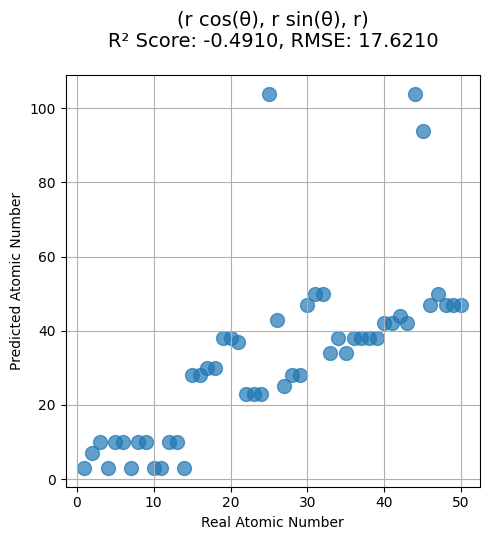

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

file_path = "periodic_table_dataset.csv"  
data = pd.read_csv(file_path)
prediction_file = 'results_linear_final/first_number_per_layer.csv'

# 加载预测的原子数
atomic_number_data = pd.read_csv(prediction_file, header=None)
atomic_number = pd.to_numeric(atomic_number_data.iloc[10, 1:52], errors='coerce').values

# 加载真实的原子数
real_atomic_number = data['Atomic Number'][:len(atomic_number)]  # 确保长度一致
real_period = data['Period'][:len(atomic_number)]  # 确保长度一致   

# 处理 NaN 值
if np.any(np.isnan(atomic_number)):
    atomic_number = np.nan_to_num(atomic_number)  

# 计算 R² 分数
r2 = r2_score(real_atomic_number, atomic_number)
print(f"R² Score: {r2:.4f}")

# 计算皮尔逊相关系数
correlation = np.corrcoef(real_atomic_number, atomic_number)[0, 1]
print(f"Pearson Correlation Coefficient: {correlation:.4f}")

# 计算绝对误差
absolute_errors = np.abs(real_atomic_number - atomic_number)

# 统计误差在2以内的占比
within_2 = np.sum(absolute_errors <= 2)
percentage_within_2 = (within_2 / len(absolute_errors)) * 100
print(f"Percentage of errors within 2: {percentage_within_2:.2f}%")

# 计算 RMSE
rmse = np.sqrt(mean_squared_error(real_atomic_number, atomic_number))
print(f"RMSE: {rmse:.4f}")

fig, ax = plt.subplots(figsize=(5, 5.5))
scatter_plot = ax.scatter(
    real_atomic_number,
    atomic_number,
    s=100,
    alpha=0.7
)

# 添加颜色条
# cbar = plt.colorbar(scatter_plot, ax=ax, orientation='vertical', pad=0.02)
# cbar.set_label("Period", fontsize=12)

# 设置标题和标签
ax.set_title(
    f"(r cos(θ), r sin(θ), r)\nR² Score: {r2:.4f}, RMSE: {rmse:.4f}",
    fontsize=14,
    pad=20
)
ax.set_xlabel("Real Atomic Number")
ax.set_ylabel("Predicted Atomic Number")

plt.grid(True)
plt.tight_layout()
plt.show()


Combination chart

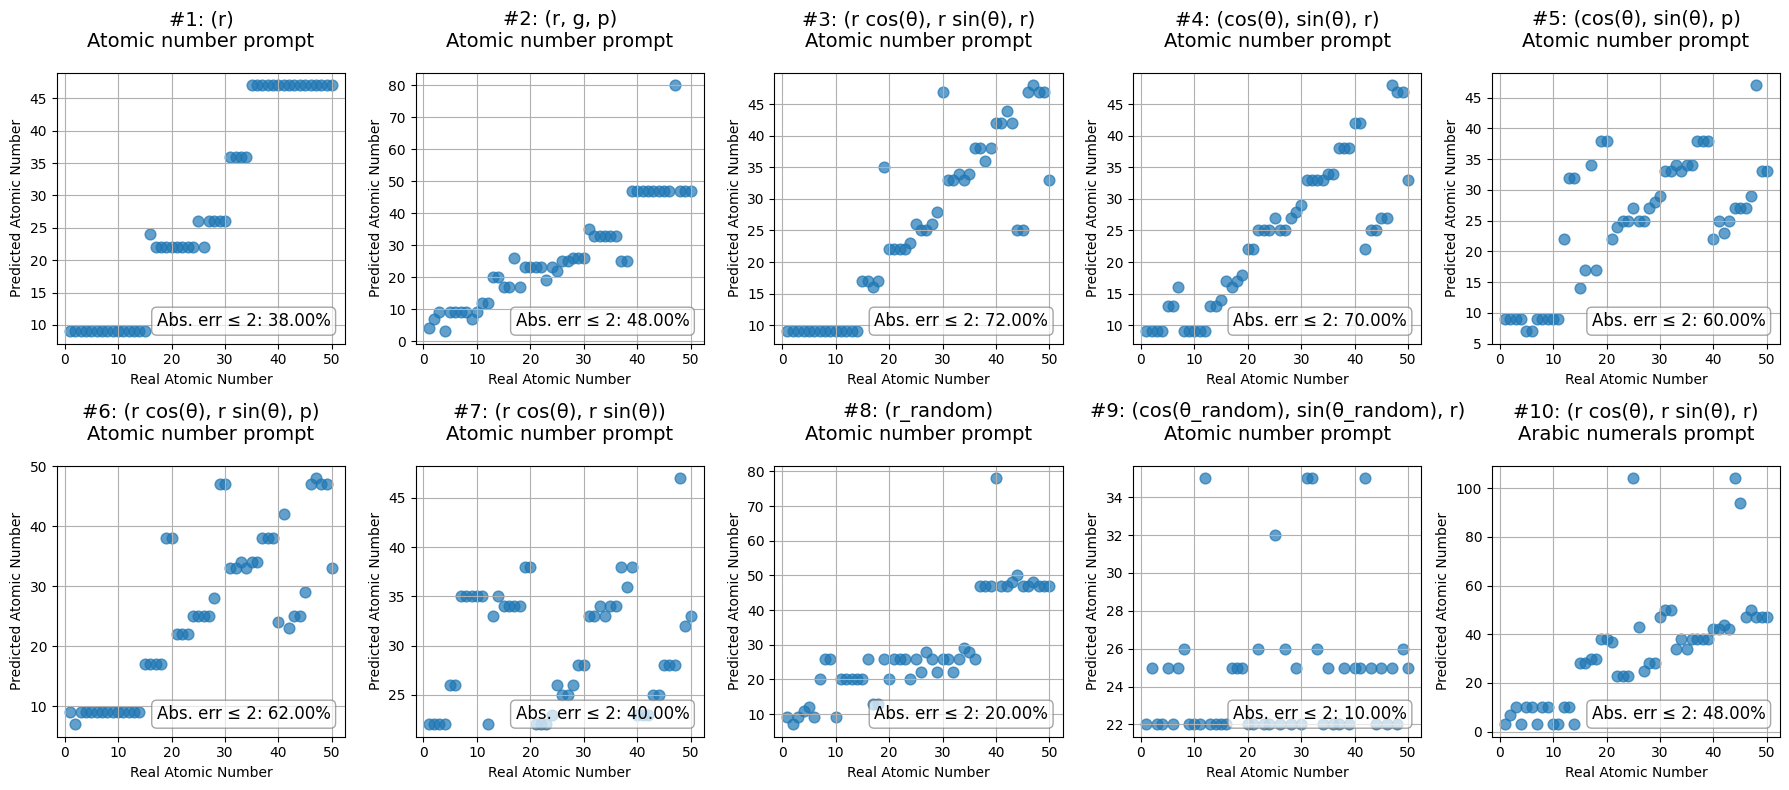

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import math

file_path = "periodic_table_dataset.csv"
data = pd.read_csv(file_path)
prediction_file = 'results_linear_final/first_number_per_layer.csv'
atomic_number_data = pd.read_csv(prediction_file, header=None)

rows = [2,8,9,4,5,1,3,7,6,10]
titles = [
    "#1: (r) - Atomic number prompt",
    "#2: (r, g, p) - Atomic number prompt",
    "#3: (r cos(θ), r sin(θ), r) - Atomic number prompt",
    "#4: (cos(θ), sin(θ), r) - Atomic number prompt",
    "#5: (cos(θ), sin(θ), p) - Atomic number prompt",
    "#6: (r cos(θ), r sin(θ), p) - Atomic number prompt",
    "#7: (r cos(θ), r sin(θ)) - Atomic number prompt",
    "#8: (r_random) - Atomic number prompt",
    "#9: (cos(θ_random), sin(θ_random), r) - Atomic number prompt",
    "#10: (r cos(θ), r sin(θ), r) - Arabic numerals prompt"
]

n_plots = len(rows)
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(n_plots/2), figsize=(18, 8))
axes = axes.flatten()

for i, row in enumerate(rows):
    atomic_number = pd.to_numeric(atomic_number_data.iloc[row, 1:52], errors='coerce').values
    real_atomic_number = data['Atomic Number'][:len(atomic_number)]
    atomic_number = np.nan_to_num(atomic_number)
    
    r2 = r2_score(real_atomic_number, atomic_number)
    
    absolute_errors = np.abs(atomic_number - real_atomic_number)
    within_2 = np.sum(absolute_errors <= 2)
    percentage_within_2 = (within_2 / len(absolute_errors)) * 100
    
    axes[i].scatter(real_atomic_number, atomic_number, s=60, alpha=0.7)
    axes[i].set_title(f"{titles[i].split(': ')[0]}: {titles[i].split(': ')[1].split(' - ')[0]}\n"
                      f"{titles[i].split(' - ')[1]}\n",
                      fontsize=14, pad=0.5)
    axes[i].set_xlabel("Real Atomic Number")
    axes[i].set_ylabel("Predicted Atomic Number")
    axes[i].grid(True)
    
    # axes[i].annotate(
    # # f"R²: {r2:.4f}\nAbs. err ≤ 2: {percentage_within_2:.2f}%",
    # f"Abs. err ≤ 2: {percentage_within_2:.2f}%",
    # xy=(0.05, 0.95),
    # xycoords='axes fraction',
    # fontsize=12,
    # ha='left',
    # va='top',
    # bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.7)

    axes[i].annotate(
    f"Abs. err ≤ 2: {percentage_within_2:.2f}%",
    xy=(0.95, 0.05),
    xycoords='axes fraction',
    fontsize=12,
    ha='right',
    va='bottom',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.7)
)

plt.tight_layout()
plt.savefig('Results/spiral/error_results.png', dpi=300)
plt.show()

Geometric Shape

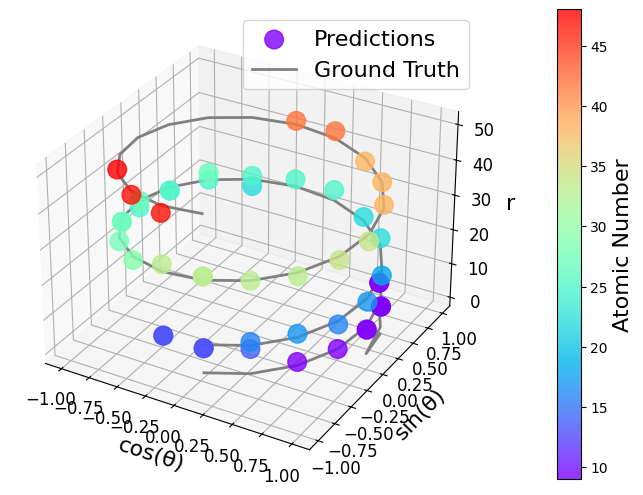

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. 加载周期表数据
file_path = "periodic_table_dataset.csv"
data = pd.read_csv(file_path)

# 2. 加载预测数据
prediction_file = 'results_linear_final/first_number_per_layer.csv'
atomic_number_data = pd.read_csv(prediction_file, header=None)
# 提取第10行（索引为9），第2到第52列（索引为1到51）的数据，并转换为数值类型
r = pd.to_numeric(atomic_number_data.iloc[4, 1:52], errors='coerce').values

# 3. 提取相关列
group = data['Group']
atomic_number = data['Atomic Number']
period = data['Period']

# 4. 计算螺旋的角度theta
theta = 2 * np.pi * group / 18

# 5. 计算螺旋的x和y坐标
# x =atomic_number* np.cos(theta)
# y =atomic_number*np.sin(theta)
# z_gt = atomic_number  # 真实值

# 5. 计算螺旋的x和y坐标
x =np.cos(theta)
y =np.sin(theta)
z_gt = atomic_number  # 真实值

# # 6. 预测值的坐标
x_pred = np.cos(theta)
y_pred = np.sin(theta)
z_pred = r.copy()


# 6. 预测值的坐标
# x_pred = r*np.cos(theta)
# y_pred = r*np.sin(theta)
# z_pred = r.copy()


# 7. 创建3D散点图
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# 8. 设置视角
# ax.view_init(elev=25, azim=60)

# 9. 绘制预测值的散点图
scatter = ax.scatter(
    x_pred, y_pred, z_pred, 
    c=z_pred, cmap='rainbow', s=180, alpha=0.8, label="Predictions"
)

# 10. 计算Group的差异，考虑循环性（组18和组1相邻）
group_diff = group.diff().fillna(0).abs()
# 计算循环差异：最小差异值
group_diff_cyclic = np.minimum(group_diff, 18 - group_diff)
# 设置断裂掩码，当循环差异大于阈值时插入NaN
break_threshold = 2  # 根据需要调整阈值
break_mask = group_diff_cyclic > break_threshold

# 11. 插入NaN以在间隙处断开真实值的折线
z_gt_interpolated = z_gt.copy()
z_gt_interpolated[break_mask] = np.nan

# 12. 绘制真实值的折线
ax.plot(
    x, y, z_gt_interpolated, 
    color='grey', linewidth=2, linestyle='-', label="Ground Truth"
)

# 13. 添加颜色条
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label("Atomic Number", fontsize=16)

# 14. 设置标题和标签
# ax.set_title("Atomic Number Prediction and Ground Truth in 3D Space", fontsize=16, fontweight='bold')
# ax.set_xlabel("r cos(θ)", fontsize=16) 
# ax.set_ylabel("r sin(θ)", fontsize=16) 
# ax.set_zlabel("r", fontsize=16)

ax.set_xlabel("cos(θ)", fontsize=16)
ax.set_ylabel("sin(θ)", fontsize=16)
ax.set_zlabel("r", fontsize=16)

# 15. 自定义刻度参数和网格
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

# 16. 添加图例
ax.legend(loc="best", fontsize=16)

# 17. 调整布局以防止标签被截断
plt.tight_layout()

# 18. 显示图形
plt.show()

output_path = "Results/spiral/spiral_plot_2.png"
fig.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close(fig)
